<a href="https://colab.research.google.com/github/jessicamadridmejia/EIA-Diplomado-IA-Modulo4/blob/master/Clase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

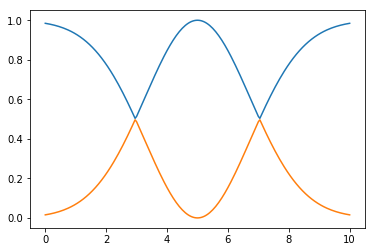

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#Complementariedad
X = np.linspace(0,10,201)
A = np.exp(-(X-5)**2/6)

plt.figure()
plt.plot(X,np.maximum(A,1-A),X,np.minimum(A,1-A))


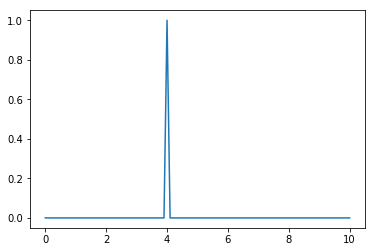

In [0]:
#Tipos de función de membresía
#singleton
X = np.linspace(0,10,101)
A = np.zeros(101)
A[X==4]=1

plt.plot(X,A)

In [0]:
pip install scikit-fuzzy

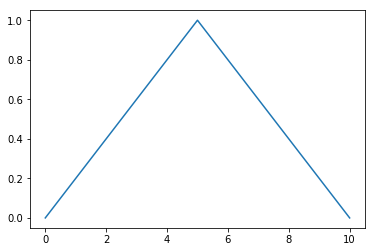

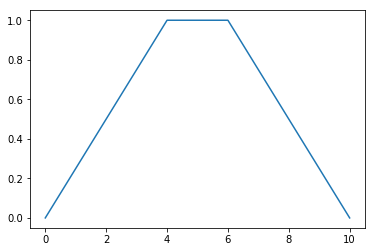

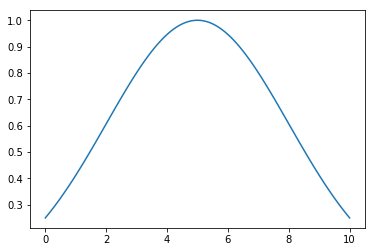

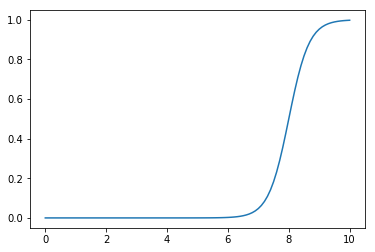

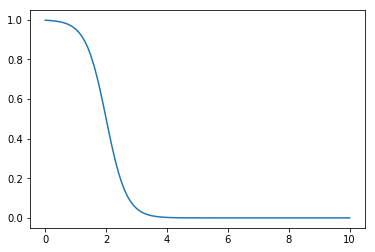

In [0]:
#Importo la librería de lógica borrosa
import skfuzzy as fuzz

#Creo un conjunto triangular
A = fuzz.trimf(X,[0,5,10])

plt.plot(X,A)

#Creo un conjunto trapezoidal
A = fuzz.trapmf(X,[0,4,6,10])

plt.figure()
plt.plot(X,A)


#Creo un conjunto gaussiano
A = fuzz.gaussmf(X,5,3)

plt.figure()
plt.plot(X,A)

#Creo un conjunto sigmoidal P+
A = fuzz.sigmf(X,8,3)

plt.figure()
plt.plot(X,A)

#Creo un conjunto sigmoidal P-
A = fuzz.sigmf(X,2,-3)

plt.figure()
plt.plot(X,A)

[[0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.1]
 [0.5 0.5 0.5 0.5]
 [0.7 0.8 0.8 0.8]
 [0.7 0.8 0.9 1. ]]


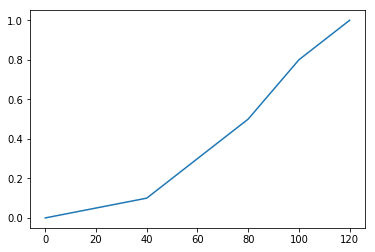

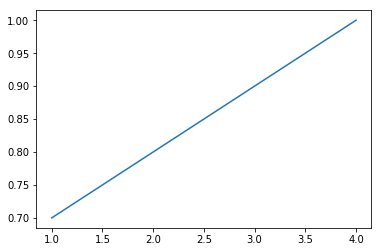

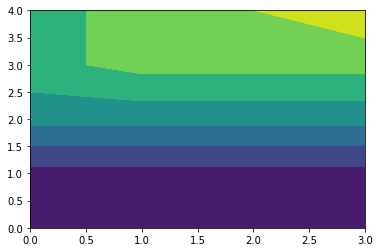

In [0]:
#Conjunto borroso velocidad alta
X = [0,40,80,100,120]
A = [0,0.1,0.5,0.8,1]
#Conjunto borroso accidente grave
Y = [1,2,3,4]
B = [0.7,0.8,0.9,1]

plt.figure()
plt.plot(X,A)
plt.figure()
plt.plot(Y,B)

R = np.zeros((5,4))

for f in range(5):
  for c in range(4):
    R[f][c] = min(A[f],B[c])

print(R)
plt.figure()
plt.contourf(R)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(101, 501)
(101, 501)
(501, 101)


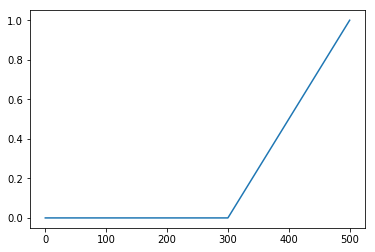

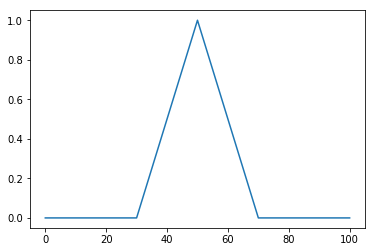

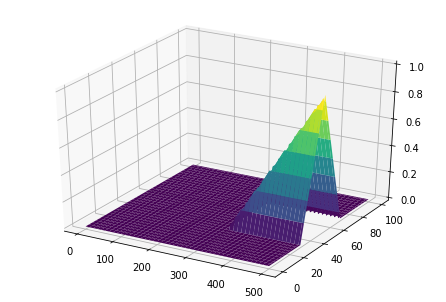

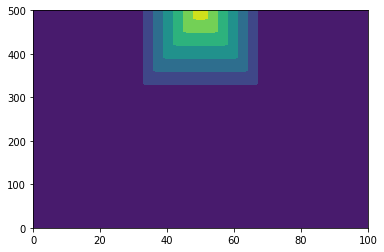

In [0]:
#Conjunto borroso para oferta de libros alta
X = np.linspace(0,500,501)
A = fuzz.trimf(X,[300,500,500])

plt.figure()
plt.plot(X,A)

#Conjunto borroso para venta de libros moderada
Y = np.linspace(0,100,101)
B = fuzz.trimf(Y,[30,50,70])

plt.figure()
plt.plot(Y,B)

#Producto cartesiano entre A y B
R = np.zeros((501,101))

for f in range(501):
  for c in range(101):
    R[f][c] = min(A[f],B[c])

print(R)


#Librería para gráficas 3D
from mpl_toolkits.mplot3d import Axes3D
#Librería de colores
from matplotlib import cm

#Capturo una gráfica 2D
fig = plt.figure()
#Le agrego un eje más (Eje z)
ax = Axes3D(fig)
#Creo una malla de valores para la gráfica
x,y = np.meshgrid(X,Y)
#Grafico la superficie
ax.plot_surface(x,y,R.transpose(),cmap=cm.viridis)
print(x.shape)
print(y.shape)
print(R.shape)

plt.figure()
plt.contourf(R)



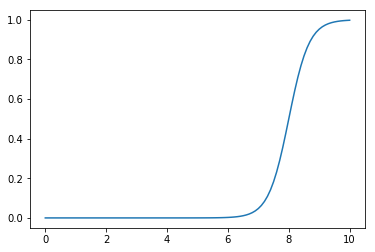

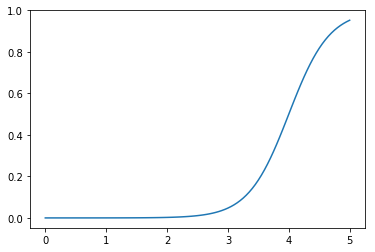

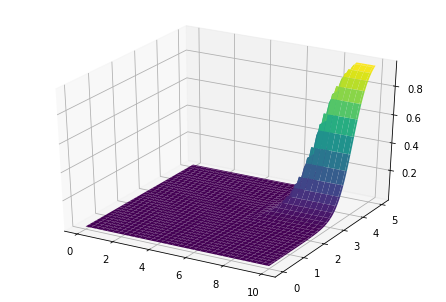

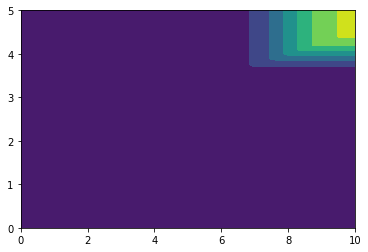

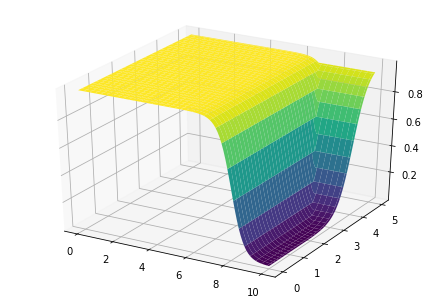

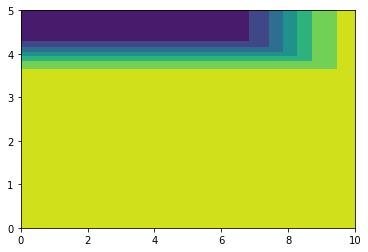

In [0]:
#Conjunto borroso estudiar mucho
X = np.linspace(0,10,101)
A = fuzz.sigmf(X,8,3)

plt.plot(X,A)

#Conjunto borroso excelente estudiante
Y = np.linspace(0,5,101)
B = fuzz.sigmf(Y,4,3)

plt.figure()
plt.plot(Y,B)

#Producto cartesiano entre A y B
R = np.zeros((101,101))

for f in range(101):
  for c in range(101):
    R[f][c] = min(A[f],B[c])

#Librería para gráficas 3D
from mpl_toolkits.mplot3d import Axes3D
#Librería de colores
from matplotlib import cm

#Capturo una gráfica 2D
fig = plt.figure()
#Le agrego un eje más (Eje z)
ax = Axes3D(fig)
#Creo una malla de valores para la gráfica
x,y = np.meshgrid(X,Y)
#Grafico la superficie
ax.plot_surface(x,y,R.transpose(),cmap=cm.viridis)

plt.figure()
plt.contourf(x,y,R)


#Implicación borrosa entre A y B
R1 = np.zeros((101,101))

for f in range(101):
  for c in range(101):
    R1[f][c] = max(1 - A[f],B[c])
    
#Capturo una gráfica 2D
fig = plt.figure()
#Le agrego un eje más (Eje z)
ax = Axes3D(fig)
#Creo una malla de valores para la gráfica
x,y = np.meshgrid(X,Y)
#Grafico la superficie
ax.plot_surface(x,y,R1.transpose(),cmap=cm.viridis)

plt.figure()
plt.contourf(x,y,R1)

(101, 101)
(101,)


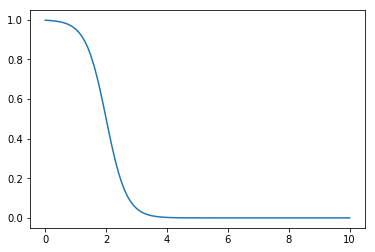

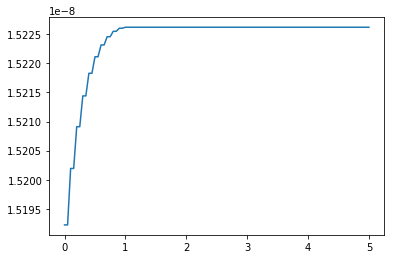

In [0]:
#conjunto borroso Mery estudia poco
AP = fuzz.sigmf(X,2,-3)

plt.figure()
plt.plot(X,AP)
print(R.shape)
print(AP.shape)
#calculo la composición
C = fuzz.maxprod_composition(AP.transpose(),R)[0]

plt.figure()
plt.plot(Y,C)


(201, 101)
(101, 501)
(201, 501)


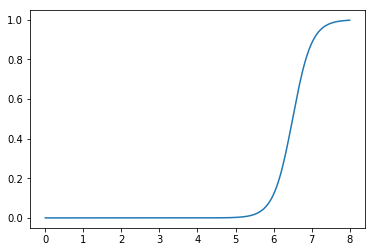

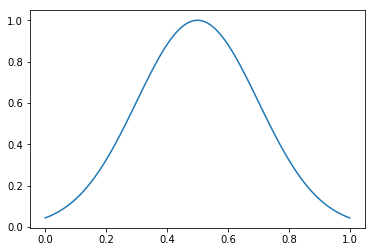

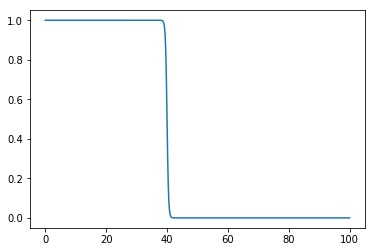

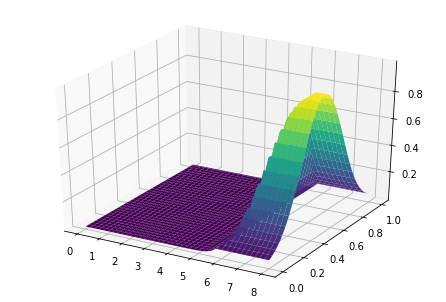

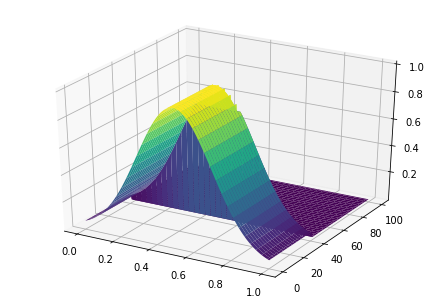

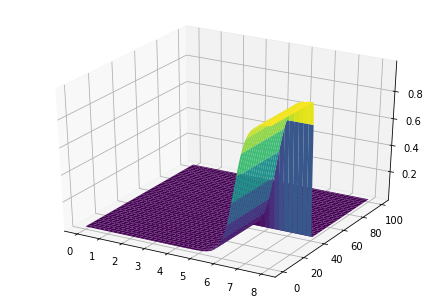

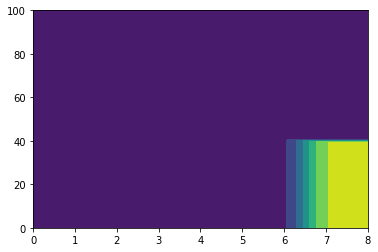

In [0]:
#Conjunto borroso cantidad nubes alta
X = np.linspace(0,8,201)
A = fuzz.sigmf(X,6.5, 4)

plt.figure()
plt.plot(X,A)
#Conjunto borroso probabilidad de lluvia moderada
Y = np.linspace(0,1,101)
B = fuzz.gaussmf(Y,0.5, 0.2)

plt.figure()
plt.plot(Y,B)
#Conjunto borroso tráfico lento
Z = np.linspace(0,100,501)
D = fuzz.sigmf(Z,40, -4)

plt.figure()
plt.plot(Z,D)


#Calculo la relación entre A y B
Rab = fuzz.relation_min(A,B) 

#Calculo la relación entre B y D
Rbd = fuzz.relation_min(B,D) 



#Capturo una gráfica 2D
fig = plt.figure()
#Le agrego un eje más (Eje z)
ax = Axes3D(fig)
#Creo una malla de valores para la gráfica
x,y = np.meshgrid(X,Y)
#Grafico la superficie
ax.plot_surface(x,y,Rab.transpose(),cmap=cm.viridis)



#Capturo una gráfica 2D
fig = plt.figure()
#Le agrego un eje más (Eje z)
ax = Axes3D(fig)
#Creo una malla de valores para la gráfica
y,z = np.meshgrid(Y,Z)
#Grafico la superficie
ax.plot_surface(y,z,Rbd.transpose(),cmap=cm.viridis)


#Composición entre Rab y Rbd
print(Rab.shape)
print(Rbd.shape)

Comp = fuzz.maxmin_composition(Rab,Rbd)

print(Comp.shape)

#Capturo una gráfica 2D
fig = plt.figure()
#Le agrego un eje más (Eje z)
ax = Axes3D(fig)
#Creo una malla de valores para la gráfica
x,z = np.meshgrid(X,Z)
#Grafico la superficie
ax.plot_surface(x,z,Comp.transpose(),cmap=cm.viridis)

plt.figure()
plt.contourf(x,z,Comp.transpose())